## Predpogoj - mount gDrive

In [1]:
# Potrebni importi
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
import argparse
import PIL.Image
import pandas as pd
import glob
from pathlib import Path
import time

In [2]:
!pip install NiaPy==2.0.0rc12 --user

In [3]:
!pip install opencv-python --user

Image Dimensions: (145, 145, 3)


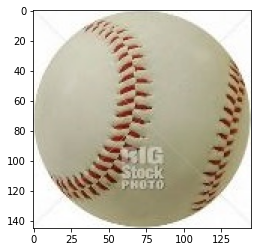

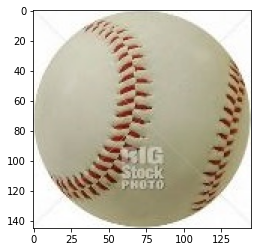

In [15]:
import cv2

def imgTO1d(img):
    oblika = img.shape
    img = img.reshape(-1)
    testko = [i / 255 for i in img] # Shrani prvoten shape slike
    return oblika, testko

def imgFROM1d(testko, oblika):
    testkoDva = [int(i * 255) for i in testko]
    testkoDva = np.asarray(testkoDva)
    testkoDva = testkoDva.reshape(oblika)
    return testkoDva


In [24]:
from NiaPy.algorithms.basic.pso import ParticleSwarmAlgorithm
from NiaPy.benchmarks import Benchmark
from NiaPy.task.task import OptimizationType, StoppingTask

class TestBenchmark(Benchmark):

    def __init__(self, iskanje):
        self.Lower = 0
        self.Upper = 1
        super().__init__(self.Lower, self.Upper)

        self.iskanje = iskanje

    def function(self):
        def evaluate(D, solution):
            # print(f'D: {D}')
            # print(f'solution: {solution}')

            razlika = 0
            for i in range(D):
                razlika = razlika + abs(iskanje[i] - solution[i])

            return razlika

        return evaluate

if __name__ == "__main__":

    originalSlika = cv2.imread('./bejzbol.JPEG')
    oblika, iskanjeSlika = imgTO1d(originalSlika)

    algoritem = ParticleSwarmAlgorithm(NP=10)

    n = 63075
    test = np.empty(n, dtype=object)
    iskanje = np.empty(3, dtype=object)
    
    for i in range(21025):
        i *= 3
        
        iskanje[0] = iskanjeSlika[i]
        iskanje[1] = iskanjeSlika[i+1]
        iskanje[2] = iskanjeSlika[i+2]
    
        benchm = TestBenchmark(iskanje=iskanje)
        task = StoppingTask(D=len(iskanje),
                            nFES=20,
                            optType=OptimizationType.MINIMIZATION,
                            benchmark=benchm)

        resitev, fitness = algoritem.run(task=task)
        test[i] = resitev[0]
        test[i+1] = resitev[1]
        test[i+2] = resitev[2]

    print("ISKANJE: ", iskanje)
    print("resitev: ", resitev)
    print("fitness: ", fitness)

ISKANJE:  [0.9882352941176471 0.9882352941176471 0.9882352941176471]
resitev:  [1. 1. 1.]
fitness:  0.0352941176470587


Type of testkoDva:  <class 'numpy.ndarray'>


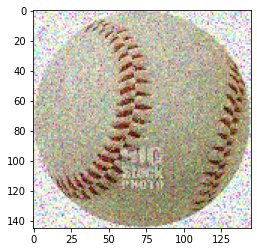

In [26]:
testkoDvaArray = imgFROM1d(test, oblika)
plt.imshow(testkoDvaArray[...,::-1])
plt.show()

In [29]:
if __name__ == "__main__":

    originalSlika = cv2.imread('./tiger.jpg')

    oblikaTiger, iskanjeSlika = imgTO1d(originalSlika)

    algoritem = ParticleSwarmAlgorithm(NP=20)  

    n = len(iskanjeSlika)
    rangeFor = (int(n / 9))

    resitevTiger = np.empty(n, dtype=object)
    iskanje = np.empty(9, dtype=object)
    
    for i in range(rangeFor):
        i *= 9
        for j in range (9):
            iskanje[j] = iskanjeSlika[i+j]
    
        benchm = TestBenchmark(iskanje=iskanje)
        task = StoppingTask(D=len(iskanje),
                            nFES=70,
                            optType=OptimizationType.MINIMIZATION,
                            benchmark=benchm)

        resitev, fitness = algoritem.run(task=task)

        for j in range (9):
            resitevTiger[i+j] = resitev[j]

    # Celotna slika --> 1d array pri NP=10.000 in nFES=100.000: "Vaša seja se je zrušila, ko ste porabili ves razpoložljivi RAM. ", rezultat pa zanič, priložen v GitHubu, ./NiaPy images/*.png

Type of testkoDva:  <class 'numpy.ndarray'>


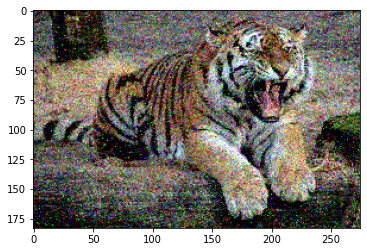

In [28]:
resitevTiger = imgFROM1d(resitevTiger, oblikaTiger)
plt.imshow(resitevTiger[...,::-1])
plt.show()